In [2]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_smoothing_spline

In [ ]:
data_path = Path(os.environ["DATA_PATH"])

In [ ]:
df = (
    pd.read_excel(data_path / "datos" / "AQ_Juarez_May2025.xlsx")
    .assign(date=lambda df: pd.to_datetime(df["date"]))
    .set_index(["estacion", "date"])
    .sort_index()
)

<Axes: xlabel='date'>

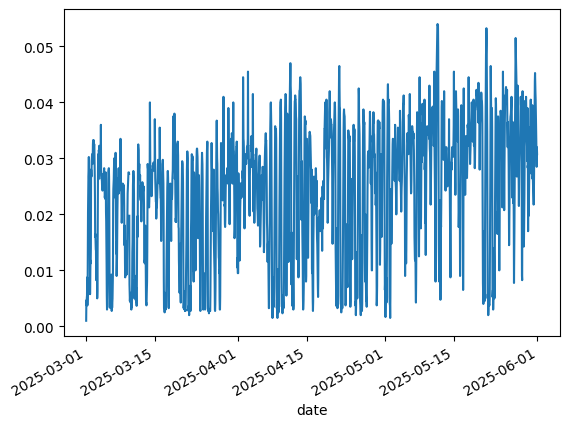

In [ ]:
grouped = df.groupby(level=1)["o3"].mean()
windowed = grouped.rolling("7D", center=True).mean()

grouped.plot()

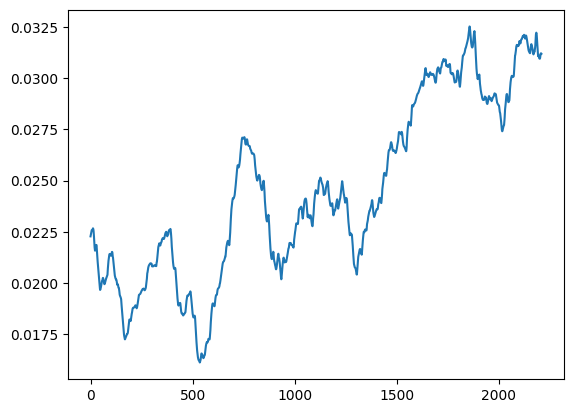

In [ ]:
spline = make_smoothing_spline(windowed.index, windowed.values)
plt.plot(spline(windowed.index))